<a href="https://colab.research.google.com/github/mamadqolami/Aviation-Accidents/blob/master/Work_Related_Injuries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# By Mohammad Gholami

# About Project

**In this study, work-related injuries are investigated and analyzed. This study aims to examine two public datasets published by the US Occupational Safety and Health Administration (OSHA), first perform an exploratory data analysis (EDA) on both datasets, then use standard and hybrid machine learning algorithms for the objective variable of the problem to predict. Finally, association rules are extracted on both datasets.**

The questions of this study are:
1. What factors have the greatest impact on occupational injuries?
2. Which category or field has experienced the highest number of occupational injuries?
3. What are the consequences of occupational injuries for workers, society, and the industry?
4. To what extent are machine algorithms applicable in predicting work-related injuries?
5. What are suitable strategies for eliminating, reducing, and managing occupational injuries?

## I. About Dataset 1
### OSHA Establishment Specific Injury and Illness Data (Injury Tracking Application):
**Data Dictionay:**

| Index | Data Element | Definition |
| --- | --- | --- |
| 1 | ID  | Unique number for each record |
| 2 | establishment_name | Employer Identification Number (EIN) is also known as Federal Tax Identification Number |
| 3 | company_name | The name of the company that owns the establishment |
| 4 | street_address | The street address of the establishment |
| 5 | city | The city where the establishment is located |
| 6 | state | The state where the establishment is located |
| 7 | zip_code | The full zip code for the establishment |
| 8 | naics_code | The North American Industry Classification System (NAICS) code which classifies an establishment’s business. |
| 9 | industry_description | Industry Description |
| 10 | size | The size of the establishment based on the maximum number of employees that worked there at any point in the year you are submitting data for. * Enter 1 if the establishment has < 20 employees * Enter 2 if the establishment has 20-249 employees * Enter 3 if the establishment has 250+ employees |
| 11 | establishment_type | Identify if the establishment is part of a state or local government. * Enter 1 if the establishment is not a government entity * Enter 2 if the establishment is a State Government entity * Enter 3 if the establishment is a Local Government entity |
| 12 | year_filing_for | The calendar year in which the injuries and illnesses reported occurred at the establishment. |
| 13 | annual_average_employees | Annual Average Number of Employees |
| 14 | total_hours_worked | Total hours worked by all employees |
| 15 | no_injuries_illnesses | Whether the establishment had any OSHA recordable work-related injuries or illnesses during the year. * Enter 1 if the establishment had injuries or illnesses * Enter 2 if the establishment did not have injuries or illnesses |
| 16 | total_deaths | Total number of deaths (Form 300A Field G) |
| 17 | total_dafw_cases | Total number of cases with days away from work (Form 300A Field H) * Must be >= 0 * Must be a number |
| 18 | total_djtr_cases | Total number of cases with job transfer or restriction (Form 300A Field I) |
| 19 | total_other_cases | Total number of other recordable cases (Form 300A Field J) |
| 20 | total_dafw_days | Total number of days away from work (Form 300A Field K) |
| 21 | total_djtr_days | Total number of days of job transfer or restriction (Form 300A Field L) |
| 22 | total_injuries | Total number of injuries (Form 300A Field M(1)) * Must be >= 0 * Must be a number |
| 23 | total_skin_disorders | Total number of skin disorders (Form 300A Field M(2)) |
| 24 | total_respiratory_conditions | Total number of respiratory conditions (Form 300A Field M(3)) |
| 25 | total_poisonings | Total number of poisonings (Form 300A Field M(4)) |
| 26 | total_hearing_loss | Total number of hearing loss (Form 300A Field M(5)) |
| 27 | total_other_illnesses | Total number of all other illnesses (Form 300A Field M(6)) |
| 28 | establishment_ID | Unique number for each establishment created under an individual user account |
| 29 | created_timestamp | The date and time a record was submitted to the ITA |
| 30 | Change_reason | The reason why an establishment’s injury and illness summary was changed, if applicable |

Link to access the dataset:
https://www.osha.gov/Establishment-Specific-Injury-and-Illness-Data

## II. About Dataset 2
### OSHA Severe Injury Reports:
**Data Dictionay:**

| Index | Data Element | Definition |
| --- | --- | --- |
| 1 | ID | Unique number for each record |
| 2 | UPA | UPA code |
| 3 | EventDate | The date of the event |
| 4 |Employer | The name of the employer's organization |
| 5 | Address1 | Address number 1 of the institution |
| 6 | Address1 | Address number 2 of the institution |
| 7 | City | Institute city |
| 8 | State | Institution state |
| 9 | Zip | Institute zip code |
| 10 | Latitude | Institute Latitude |
| 11 | Longitude | Institute Longitude |
| 12 | Primary NAICS | Primary The North American Industry Classification System (NAICS) code which classifies an establishment’s business |
| 13 | Hospitalized | 0 means not hospitalized and 1 means hospitalized |
| 14 | Amputation | 0 means no amputation, 1 means amputation |
| 15 | Inspection | Inspection code|
| 16 | Final Narrative | The final narrative of the accident |
| 17 | Nature | Nature of injury code |
| 18 | NatureTitle | Nature of injury title |
| 19 | Part of Body | Part of body code |
| 20 | Part of Body Title | Part of body title |
| 21 | Event | Event code |
| 22 | EventTitle | Event title |
| 23 | Source | Source of accident code |
| 24 | SourceTitle | Source of accident title |
| 25 | Secondary Source | Secondary Source of accident code |
| 26 | Secondary Source Title | Secondary Source of accident title |

Link to access the dataset:
https://www.osha.gov/severeinjury

**First, Let's look at the First dataset**

# 1. Data Collection

## 1.1 Import Libraries For Overview & EDA

In [1]:
%pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

## 1.2 Collection Of Datasets

In [3]:
from google.colab import files
uploaded_2016 = files.upload()

KeyboardInterrupt: ignored

In [5]:
import io
df2016 = pd.read_csv(io.BytesIO(uploaded_2016['ITA Data CY 2016.csv']))
# Dataset2016 is now stored in a Pandas Dataframe

In [6]:
uploaded_2017 = files.upload()

Saving ITA Data CY 2017.csv to ITA Data CY 2017.csv


In [7]:
df2017 = pd.read_csv(io.BytesIO(uploaded_2017['ITA Data CY 2017.csv']))
# Dataset2017 is now stored in a Pandas Dataframe

In [8]:
uploaded_2018 = files.upload()

Saving ITA Data CY 2018.csv to ITA Data CY 2018.csv


In [11]:
df2018 = pd.read_csv(io.BytesIO(uploaded_2018['ITA Data CY 2018.csv']),encoding='cp1252')
# Dataset2018 is now stored in a Pandas Dataframe

In [12]:
uploaded_2019 = files.upload()

Saving ITA Data CY 2019.csv to ITA Data CY 2019.csv


In [14]:
df2019 = pd.read_csv(io.BytesIO(uploaded_2019['ITA Data CY 2019.csv']),low_memory=False)
# Dataset2019 is now stored in a Pandas Dataframe

In [15]:
uploaded_2020 = files.upload()

Saving ITA Data CY 2020.csv to ITA Data CY 2020.csv


In [16]:
df2020 = pd.read_csv(io.BytesIO(uploaded_2020['ITA Data CY 2020.csv']))
# Dataset2020 is now stored in a Pandas Dataframe

In [17]:
uploaded_2021 = files.upload()

Saving ITA Data CY 2021 submitted thru 8-29-2022.csv to ITA Data CY 2021 submitted thru 8-29-2022.csv


In [18]:
df2021 = pd.read_csv(io.BytesIO(uploaded_2021['ITA Data CY 2021 submitted thru 8-29-2022.csv']))
# Dataset2021 is now stored in a Pandas Dataframe

In [19]:
uploaded_2022 = files.upload()

Saving ITA Data CY 2022 submitted thru 3-2-2023.csv to ITA Data CY 2022 submitted thru 3-2-2023.csv


In [21]:
df2022 = pd.read_csv(io.BytesIO(uploaded_2022['ITA Data CY 2022 submitted thru 3-2-2023.csv']),low_memory=False)
# Dataset2022 is now stored in a Pandas Dataframe

## 1.3 Integration of Datasets

In [22]:
data = pd.concat([df2016,df2017,df2018,df2019,df2020,df2021,df2022],axis=0)

In [23]:
data.reset_index(inplace = True)

In [24]:
data.drop(['index'],axis=1,inplace=True)

# 2. Data Mining

## 2.1 Overview Of The Dataset

In [25]:
data.head()

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason
0,4.0,"McKamish, Inc.","McKamish, Inc.",NaN,50 55th Street,Pittsburgh,PA,15201.0,238220.0,"Heating, ventilation and air-conditioning (HVA...",...,0.0,0.0,0.0,0.0,41920.0,1.0,3.0,2016.0,8/1/2017 6:12:00,NaN
1,5.0,"The Talaria Company, LLC",The Hinckley Company,NaN,40 Industrial Way,Trenton,ME,4605.0,336612.0,Pleasure boats manufacturing,...,0.0,0.0,0.0,0.0,41922.0,1.0,3.0,2016.0,8/1/2017 6:23:00,NaN
2,6.0,Williamsburg Manufacturing,Williamsburg Manufacturing,NaN,408 Maplewood Ave,Williamsburg,IA,52361.0,336370.0,Motor vehicle metal parts stamping,...,0.0,0.0,0.0,0.0,41923.0,1.0,3.0,2016.0,8/1/2017 6:27:00,NaN
3,7.0,"The Talaria Company, LLC","Morris Yachts, LLC",NaN,27 Ramp Road,Trenton,ME,4605.0,336612.0,Pleasure boats manufacturing,...,0.0,0.0,0.0,0.0,41925.0,1.0,2.0,2016.0,8/1/2017 6:36:00,Hit wrong hyperlink
4,8.0,"The Talaria Company, LLC","Hunt Yachts, LLC",NaN,1909 Alden Landing,Portsmouth,RI,2871.0,336612.0,Pleasure boats manufacturing,...,0.0,0.0,0.0,0.0,41926.0,1.0,2.0,2016.0,8/1/2017 6:35:00,NaN


In [26]:
data.tail()

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason
1972570,2071485.0,"DDH Hotel Somerville, LLC",Holiday Inn Boston Bunker Hill,272167407,"30 Washington Street, Somerville, MA 02143",Somerville,MA,2143.0,721110.0,Hotels (except casino hotels),...,0.0,0.0,0.0,0.0,1044671.0,1.0,2.0,2022.0,3/4/2023 2:57:38,NaN
1972571,2071486.0,"Skybokx 109 of Natick, LLC",Skybokx 109,800825611,319 Speen Street,Natick,MA,1760.0,721110.0,Hotels (except casino hotels),...,0.0,0.0,0.0,0.0,1044672.0,1.0,2.0,2022.0,3/4/2023 3:00:07,NaN
1972572,2071487.0,"DDH Hotel Mystic, LLC",Hilton Mystic,464591942,20 Coogan Boulevard,Mystic,CT,6355.0,721110.0,Hotels (except casino hotels),...,0.0,0.0,0.0,0.0,1044673.0,1.0,2.0,2022.0,3/4/2023 3:02:51,NaN
1972573,2071488.0,Matrix Surfaces Inc,Matrix Surfaces Inc,330943467,5449 E La Palma Ave,Anaheim,CA,92807.0,238340.0,Ceramic tile installation,...,0.0,0.0,0.0,1.0,1044674.0,1.0,2.0,2022.0,3/4/2023 3:06:40,NaN
1972574,2071489.0,Courtyard by Marriott Morgan Hill,Courtyard by Marriott San Jose South Morgan Hill,208725068,18610 Madrone Pkwy,morgan Hill,CA,950372837.0,721110.0,"Hotels, resort, without casinos",...,0.0,0.0,0.0,0.0,825476.0,1.0,1.0,2022.0,3/4/2023 3:15:05,NaN


In [27]:
data.sample(5)

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason
1953265,2051581.0,Envision Healthcare Corporation,1931-00013476,330829318,2002 S. CENTRAL AVENUE,COMPTON,CA,90220.0,621910.0,"Ambulance Services, air or ground",...,0.0,0.0,0.0,0.0,1033036.0,1.0,2.0,2022.0,3/2/2023 19:14:52,NaN
16848,17385.0,Holly Nursing Care Center,Holly Nursing Care Center,NaN,"320 North 8th, PO Box 636",Holly,CO,81047.0,623110.0,Convalescent homes or convalescent hospitals (...,...,0.0,0.0,0.0,0.0,63236.0,1.0,2.0,2016.0,10/13/2017 12:19:00,NaN
581322,582590.0,Schlumberger Technology Corporation,Schlumberger Technology Corporation,NaN,7104 W County Rd 116,Midland,TX,79706.0,213112.0,Pumping oil and gas wells on a contract basis,...,0.0,1.0,0.0,1.0,444038.0,1.0,3.0,2018.0,2/19/2019 21:10:24,NaN
262464,263235.0,Valiant Integrated Services,Hickam AFB O&M,NaN,755 Scott Circle Rm. B115,Hickam AFB,HI,86853.0,561210.0,Facility Support Services,...,0.0,0.0,0.0,0.0,131701.0,1.0,1.0,2017.0,5/2/2018 21:00:51,NaN
1201282,1237497.0,Serco Inc.,"Serco - Alexandria, VA - Office",222902286.0,"4300 King Street, Suite 101",Alexandria,VA,22302.0,336611.0,Ship Building and Repairing,...,1.0,0.0,0.0,0.0,683012.0,1.0,2.0,2020.0,2/22/2021 13:40:51,NaN


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972575 entries, 0 to 1972574
Data columns (total 31 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            float64
 1   company_name                  object 
 2   establishment_name            object 
 3   ein                           object 
 4   street_address                object 
 5   city                          object 
 6   state                         object 
 7   zip_code                      float64
 8   naics_code                    float64
 9   industry_description          object 
 10  annual_average_employees      float64
 11  total_hours_worked            float64
 12  no_injuries_illnesses         float64
 13  total_deaths                  float64
 14  total_dafw_cases              float64
 15  total_djtr_cases              float64
 16  total_other_cases             float64
 17  total_dafw_days               float64
 18  total_djtr_days       

In [29]:
data.describe()

,id,zip_code,naics_code,annual_average_employees,total_hours_worked,no_injuries_illnesses,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,...,total_djtr_days,total_injuries,total_poisonings,total_respiratory_conditions,total_skin_disorders,total_hearing_loss,total_other_illnesses,establishment_id,size,year_filing_for
count,1.972575e+06,1.972573e+06,1.972575e+06,1.972575e+06,1.972562e+06,1.972573e+06,1.972574e+06,1.972575e+06,1.972574e+06,1.972574e+06,...,1.972574e+06,1.972574e+06,1.972574e+06,1.972574e+06,1.972574e+06,1.972574e+06,1.972574e+06,1.972574e+06,1.972575e+06,1.972574e+06
mean,1.024899e+06,2.564559e+07,4.592413e+05,2.179808e+03,8.946953e+06,1.358583e+00,3.252096e-03,1.792612e+00,1.341494e+00,1.690260e+00,...,1.139768e+02,4.180021e+00,2.051127e-03,3.301270e-01,2.758325e-02,3.657353e-02,2.512636e-01,4.202365e+05,1.956810e+00,2.019205e+03
std,6.049930e+05,1.287784e+08,1.595484e+05,1.259072e+06,1.198439e+10,4.795845e-01,6.750226e-02,9.654402e+00,7.475304e+00,8.711924e+00,...,5.008029e+04,1.718074e+01,7.783268e-02,5.637211e+00,4.002607e-01,6.221094e-01,3.779218e+00,2.696314e+05,5.204514e-01,1.956930e+00
min,4.000000e+00,0.000000e+00,1.111000e+05,0.000000e+00,-4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,...,-1.730000e+02,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.192000e+04,1.000000e+00,2.016000e+03
25%,4.944315e+05,2.980500e+04,3.328120e+05,2.300000e+01,3.570500e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900920e+05,2.000000e+00,2.018000e+03
50%,1.019216e+06,5.240400e+04,4.451100e+05,4.800000e+01,8.112000e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.695960e+05,2.000000e+00,2.019000e+03
75%,1.558474e+06,7.990700e+04,5.616120e+05,1.150000e+02,1.964528e+05,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.500000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.134658e+05,2.000000e+00,2.021000e+03
max,2.071489e+06,9.993000e+08,9.999990e+05,1.331667e+09,1.683162e+13,2.000000e+00,2.700000e+01,1.789000e+03,2.277000e+03,1.596000e+03,...,7.024762e+07,4.563000e+03,3.100000e+01,1.696000e+03,1.260000e+02,1.990000e+02,1.067000e+03,1.044674e+06,3.000000e+00,2.022000e+03


## 2.2 Data Cleaning

**We will examine the columns and their values**

### 2.2.1 Columns

In [30]:
data.columns

Index(['id', 'company_name', 'establishment_name', 'ein', 'street_address',
       'city', 'state', 'zip_code', 'naics_code', 'industry_description',
       'annual_average_employees', 'total_hours_worked',
       'no_injuries_illnesses', 'total_deaths', 'total_dafw_cases',
       'total_djtr_cases', 'total_other_cases', 'total_dafw_days',
       'total_djtr_days', 'total_injuries', 'total_poisonings',
       'total_respiratory_conditions', 'total_skin_disorders',
       'total_hearing_loss', 'total_other_illnesses', 'establishment_id',
       'establishment_type', 'size', 'year_filing_for', 'created_timestamp',
       'change_reason'],
      dtype='object')

#### 2.2.1.1 id

In [31]:
data['id'].nunique()

1972575

**As a result, there are no duplicate identifiers**

#### 2.2.1.2 company_name

In [33]:
data['company_name'].value_counts()

USPS                    31780
Ricoh USA Inc           23766
US Postal Service       18191
SODEXO                  18040
Dollar Tree             14682
                        ...  
Gentry heating inc          1
VILLAGE OF MARINE           1
Payless Insulation          1
Jacobo Farm Services        1
Matrix Surfaces Inc         1
Name: company_name, Length: 252166, dtype: int64

In [42]:
data['company_name'] = data['company_name'].replace('US Postal Service', 'USPS')

In [43]:
data['company_name'].value_counts()

USPS                             49971
Ricoh USA Inc                    23766
SODEXO                           18040
Dollar Tree                      14682
Wal-Mart Stores Inc.             14098
                                 ...  
ArmorStruxx, LLC.                    1
Global A 1st Flagship Company        1
Minnesota Roadways Co                1
GoodFibers                           1
Matrix Surfaces Inc                  1
Name: company_name, Length: 252165, dtype: int64

**Most of the injuries involved the United States Postal Service (USPS). Next is Ricoh USA Inc, a digital service provider. The third place with the most injuries is Sodexo, which is a French food service and facilities management company.**

#### 2.2.1.3 establishment_name

In [44]:
data['establishment_name'].value_counts()

Main Office                                  1275
Corporate Office                              891
Corporate                                     816
Construction                                  735
Headquarters                                  596
                                             ... 
Baltimore Central Booking & Intake Center       1
Three Trade Consultants, Inc                    1
Catholic Residential Services                   1
Lee Company - Fab Shop                          1
Matrix Surfaces Inc                             1
Name: establishment_name, Length: 770490, dtype: int64

**It can be seen that most of the Injuries were in the main offices**

#### 2.2.1.4 ein

In [46]:
data['ein'].nunique()

223624

In [47]:
data['ein'].unique()

array([nan, 232922276.0, 263354553.0, ..., '800825611', '464591942',
       '330943467'], dtype=object)

In [48]:
data['ein'].isnull().sum()

911056

**It can be seen that the employers' identification numbers (EIN) are not all unique and there is also missing data in this column**

#### 2.2.1.5 street_address

In [49]:
data['street_address'].value_counts()

VIRTUAL                                   13125
1350 EUCLID AVE                             682
19387 US 19 N                               541
OFFSITE                                     524
241 Ralph McGill Boulevard NE BIN10180      468
                                          ...  
1030 W. Alex-Bell Road                        1
LAMBERT ST. LOUIS INT. AIRPORT                1
16443 Minnesota Ave                           1
7100 Glacier Hwy                              1
5449 E La Palma Ave                           1
Name: street_address, Length: 712499, dtype: int64

In [50]:
data['street_address'].nunique()

712499

**All rows are for 712,499 streets in the United States. The most records have been recorded on Virtual Street.**

#### 2.2.1.6 city

In [51]:
data['city'].value_counts()

Houston                           15322
Phoenix                            7613
Chicago                            7406
Columbus                           6840
Indianapolis                       6431
                                  ...  
GLENDIVE                              1
GREAT FALLS                           1
HAVRE                                 1
HELENA                                1
Belleuve                              1
Name: city, Length: 46506, dtype: int64

In [52]:
data['city'].nunique()

46506

**All rows correspond to 46,506 cities in the United States. The most records are recorded in the city of Houston.**

#### 2.2.1.7 state

In [53]:
data['state'].value_counts()

CA    198270
TX    150830
FL    105925
OH     91801
PA     90333
       ...  
va         1
wv         1
mn         1
Mo         1
Va         1
Name: state, Length: 99, dtype: int64

In [54]:
data['state'].nunique()

99

**Of the 99 states recorded in this dataset, most of them were in California, Texas and Florida**

#### 2.2.1.8 zip_code

In [55]:
data['zip_code'].value_counts()

91761.0        1658
28273.0        1364
33619.0        1357
77041.0        1349
90670.0        1307
               ... 
3024.0            1
17312.0           1
483402857.0       1
8813.0            1
64432905.0        1
Name: zip_code, Length: 71704, dtype: int64

In [56]:
data['zip_code'].nunique()

71704

**71704 zip codes are registered in this dataset.**

#### 2.2.1.9 naics_code

In [57]:
data['naics_code'].value_counts()

445110.0    118101
623110.0     53296
491110.0     50249
721110.0     39112
722310.0     37077
             ...  
488519.0         1
812231.0         1
221123.0         1
221125.0         1
459310.0         1
Name: naics_code, Length: 2268, dtype: int64

In [58]:
data['naics_code'].nunique()

2268

**A total of 2,268 North American Industry Classification System codes are recorded in this dataset. These codes classify the business of an institution.**

#### 2.2.1.10 industry_description

In [59]:
data['industry_description'].value_counts()

Mail and Parcel Delivery                                                 49944
Office Equipment                                                         32797
Supermarkets and Other Grocery (except Convenience) Stores               23888
 Skilled nursing facilities                                              18400
Food Service Contractors                                                 17070
                                                                         ...  
Service-Facilities Support                                                   1
Gymnasium and playground equipment, manufacturing                            1
Property managing, commercial real estate                                    1
Temples and fronts (i.e., eyeglass frames), ophthalmic, manufacturing        1
 Small business development agencies                                         1
Name: industry_description, Length: 38567, dtype: int64

In [60]:
data['industry_description'].nunique()

38567

**The definition of industries in this column is that the largest number, as mentioned, is related to mail and package delivery**

#### 2.2.1.11 annual_average_employees

In [61]:
data['annual_average_employees'].value_counts()

1.0          47155
20.0         41686
25.0         34029
22.0         33858
21.0         33691
             ...  
4182.0           1
14884.0          1
1184464.0        1
2270695.0        1
4390.0           1
Name: annual_average_employees, Length: 6759, dtype: int64

In [62]:
data['annual_average_employees'].nunique()

6759

In [63]:
data['annual_average_employees'].max()

1331666667.0

**This column shows the annual average number of employees of the institution, where 47,155 institutions had only 1 employee per year on average.**

#### 2.2.1.12 total_hours_worked

In [64]:
data['total_hours_worked'].value_counts()

2000.0       12133
0.0           5742
4000.0        2805
2080.0        2249
52000.0       1807
             ...  
1077025.0        1
2933793.0        1
338435.0         1
311716.0         1
5695445.0        1
Name: total_hours_worked, Length: 515730, dtype: int64

In [65]:
data['total_hours_worked'].nunique()

515730

**This column displays the total working hours for all employees. 12,133 institutions have calculated 2,000 working hours per year.**

#### 2.2.1.13 no_injuries_illnesses

In [66]:
data['no_injuries_illnesses'].value_counts()

1.0    1265242
2.0     707331
Name: no_injuries_illnesses, dtype: int64

In [70]:
data['no_injuries_illnesses'] = data['no_injuries_illnesses'].replace(2.0, 0.0)

In [71]:
data['no_injuries_illnesses'].value_counts()

1.0    1265242
0.0     707331
Name: no_injuries_illnesses, dtype: int64

**Occupational injury occurred in 1265242 institutions during the year, and no occupational injury occurred in 707331 institutions during the year.**

#### 2.2.1.14 total_deaths

In [72]:
data['total_deaths'].value_counts()

0.0     1966697
1.0        5546
2.0         242
3.0          53
4.0          15
5.0           6
7.0           5
6.0           4
9.0           1
11.0          1
8.0           1
12.0          1
10.0          1
27.0          1
Name: total_deaths, dtype: int64

**1966697 cases, the total number of deaths in a question was 0.**

#### 2.2.1.15 total_dafw_cases

In [73]:
data['total_dafw_cases'].value_counts()

0.0      1152764
1.0       359762
2.0       161535
3.0        86799
4.0        52137
          ...   
337.0          1
855.0          1
364.0          1
682.0          1
190.0          1
Name: total_dafw_cases, Length: 491, dtype: int64

**In most cases, there were 0 days away from work.**

#### 2.2.1.16 total_djtr_cases

In [74]:
data['total_djtr_cases'].value_counts()

0.0       1315483
1.0        275404
2.0        127860
3.0         71756
4.0         45037
           ...   
264.0           1
301.0           1
2197.0          1
254.0           1
305.0           1
Name: total_djtr_cases, Length: 359, dtype: int64

**In most cases, there is no job transfer or restriction.**

#### 2.2.1.17 total_other_cases

In [75]:
data['total_other_cases'].value_counts()

0.0      1179462
1.0       338399
2.0       160802
3.0        87741
4.0        52889
          ...   
480.0          1
530.0          1
379.0          1
392.0          1
376.0          1
Name: total_other_cases, Length: 465, dtype: int64

**In most cases, there were 0 cases of other injuries.**

#### 2.2.1.18 total_dafw_days

In [76]:
data['total_dafw_days'].value_counts()

0.0        1152666
1.0          41883
2.0          40368
3.0          32173
4.0          24047
            ...   
13421.0          1
2234.0           1
3392.0           1
4530.0           1
3755.0           1
Name: total_dafw_days, Length: 5017, dtype: int64

**In 1,152,666 cases, the total number of days away from work was 0.**

#### 2.2.1.18 total_djtr_days

In [77]:
data['total_djtr_days'].value_counts()

0.0       1193132
7.0         19907
5.0         14762
14.0        14391
10.0        13249
           ...   
3023.0          1
4322.0          1
3435.0          1
5664.0          1
2809.0          1
Name: total_djtr_days, Length: 5029, dtype: int64

**In 1,193,132 cases, the total number of days of job transfer or restriction was 0.**

#### 2.2.1.19 total_injuries

In [78]:
data['total_injuries'].value_counts()

0.0       732108
1.0       349968
2.0       214465
3.0       144286
4.0       103221
           ...  
958.0          1
1072.0         1
635.0          1
395.0          1
464.0          1
Name: total_injuries, Length: 700, dtype: int64

**The total number of injuries per year in 732,108 institutions was 0.**

#### 2.2.1.20 total_poisonings

In [79]:
data['total_poisonings'].value_counts()

0.0     1969752
1.0        2308
2.0         276
3.0         101
4.0          49
5.0          30
6.0          14
8.0          11
7.0           8
9.0           7
10.0          7
13.0          2
12.0          2
11.0          2
15.0          1
25.0          1
19.0          1
14.0          1
31.0          1
Name: total_poisonings, dtype: int64

**The total number of poisonings was 0 in most cases.**

#### 2.2.1.21 total_respiratory_conditions

In [80]:
data['total_respiratory_conditions'].value_counts()

0.0       1899387
1.0         28807
2.0          9543
3.0          5684
4.0          3952
           ...   
310.0           1
353.0           1
809.0           1
210.0           1
1407.0          1
Name: total_respiratory_conditions, Length: 353, dtype: int64

**The total number of respiratory injury conditions was 0 in most cases.**

#### 2.2.1.22 total_skin_disorders

In [81]:
data['total_skin_disorders'].value_counts()

0.0      1937929
1.0        26613
2.0         4631
3.0         1532
4.0          693
5.0          387
6.0          216
7.0          145
8.0           89
10.0          61
9.0           51
12.0          38
11.0          29
13.0          24
14.0          15
16.0          12
15.0          12
25.0           8
18.0           8
17.0           7
21.0           6
19.0           6
22.0           6
20.0           4
23.0           4
26.0           3
29.0           3
36.0           3
27.0           3
30.0           2
76.0           2
32.0           2
31.0           2
24.0           2
34.0           2
55.0           2
80.0           1
112.0          1
105.0          1
39.0           1
41.0           1
42.0           1
35.0           1
63.0           1
53.0           1
37.0           1
94.0           1
72.0           1
90.0           1
45.0           1
62.0           1
59.0           1
126.0          1
106.0          1
64.0           1
49.0           1
122.0          1
50.0           1
Name: total_sk

**The total number of skin disorders and injuries per year was also 0 in most cases.**

#### 2.2.1.23 total_hearing_loss

In [82]:
data['total_hearing_loss'].value_counts()

0.0      1946453
1.0        13603
2.0         4978
3.0         2529
4.0         1518
          ...   
78.0           1
95.0           1
72.0           1
105.0          1
108.0          1
Name: total_hearing_loss, Length: 76, dtype: int64

**The total number of hearing loss in the institute was 0 in 1,946,453 cases.**

#### 2.2.1.24 total_other_illnesses

In [83]:
data['total_other_illnesses'].value_counts()

0.0      1843055
1.0        75058
2.0        21198
3.0         9514
4.0         5302
          ...   
273.0          1
344.0          1
461.0          1
699.0          1
304.0          1
Name: total_other_illnesses, Length: 286, dtype: int64

**The total number of other diseases in the year was 0 at 1,843,055 cases.**

#### 2.2.1.25 establishment_id

In [84]:
data['establishment_id'].nunique()

871736

In [85]:
data['establishment_id'].value_counts()

178612.0     8
173632.0     8
180295.0     8
180127.0     8
180529.0     8
            ..
546636.0     1
546635.0     1
546634.0     1
546633.0     1
1044674.0    1
Name: establishment_id, Length: 871736, dtype: int64

**There are 871,736 unique institutions in this dataset that have received a unique number for an individual user account.**

#### 2.2.1.26 establishment_type

In [86]:
data['establishment_type'].value_counts()

1.0                                  1494097
1                                     274737
3.0                                    45843
2.0                                    25837
3                                       8298
2                                       4483
0.0                                       47
Executive and Legislative Offices          1
Name: establishment_type, dtype: int64

In [142]:
data['establishment_type'] = data['establishment_type'].replace([1.0,2.0,3.0], [1,2,3])
data['establishment_type'] = data['establishment_type'].replace(['1','2','3','0.0'], [1,2,3,0])

In [143]:
data['establishment_type'].value_counts()

1    1538094
3      49940
2      25106
Name: establishment_type, dtype: int64

In [ ]:
data[data['establishment_type']=='Executive and Legislative Offices']

In [ ]:
data.drop(831728,axis=0,inplace=True)

**1,768,834 institutions in this dataset are not a government entity. 30,320 are state government institutions and 54,141 are local government institutions**

#### 2.2.1.27 size

In [91]:
data['size'].value_counts()

2.0    1434585
1.0     311593
3.0     226397
Name: size, dtype: int64

**311,593 institutions have less than 20 employees. 1,434,585 institutions have between 20 and 249 employees and 226,397 institutions have 250 or more employees.**

#### 2.2.1.28 year_filing_for

In [92]:
data['year_filing_for'].value_counts()

2022.0    316537
2021.0    307900
2020.0    293392
2019.0    290475
2018.0    289534
2017.0    259758
2016.0    214978
Name: year_filing_for, dtype: int64

**It can be seen that the occurrence of accidents during the years 2016 to 2022 had an upward trend.**

#### 2.2.1.29 created_timestamp

In [93]:
data['created_timestamp'].value_counts()

11/27/2017 15:25:00    720
2/28/2022 20:05:00     635
11/7/2017 17:00:00     623
11/29/2017 16:22:00    520
11/21/2017 20:43:00    518
                      ... 
2/4/2020 20:29:23        1
2/4/2020 20:29:31        1
2/4/2020 20:29:48        1
2/4/2020 20:29:49        1
3/4/2023 3:15:05         1
Name: created_timestamp, Length: 1186463, dtype: int64

#### 2.2.1.30 change_reason

In [94]:
data['change_reason'].value_counts()

0                                                                       11543
                                                                        10064
Initial Submission                                                       2761
Previously rejected for comma in Total Hours Worked column               2403
initial submission                                                       1071
                                                                        ...  
Had to edit the establishment.                                              1
Thought I type in number wrong but correct first time.                      1
Hours error                                                                 1
Data error entry for total hours worked due to decimal point issue.         1
Made a mistake on the annual average number of employees.                   1
Name: change_reason, Length: 19029, dtype: int64

### 2.2.2 Drop Non-Important Columns

<Axes: >

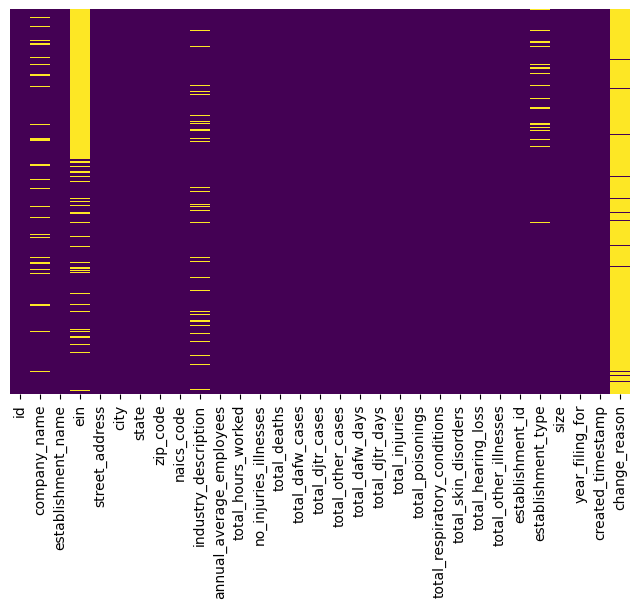

In [95]:
plt.figure(figsize=(8,5))
sns.heatmap(data=data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [96]:
data.drop(['change_reason','created_timestamp','ein'],
         axis=1,inplace=True)

### 2.2.3 Drop Missing Data

In [97]:
data.dropna(inplace=True)

<Axes: >

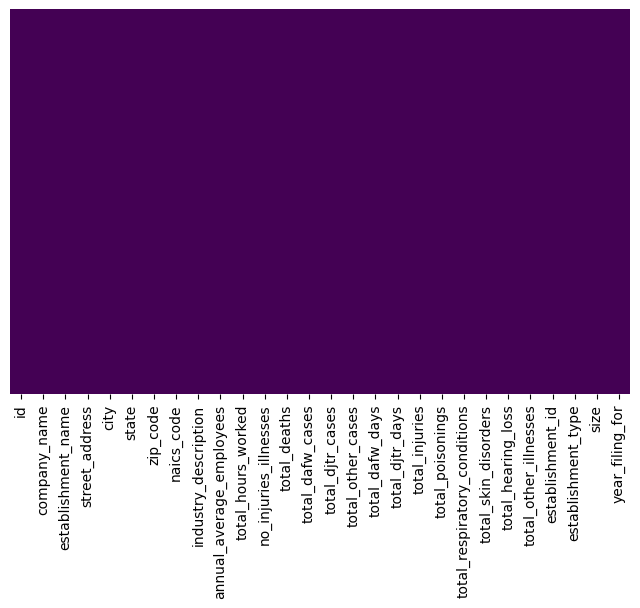

In [98]:
plt.figure(figsize=(8,5))
sns.heatmap(data=data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

## 2.4 Data Transform

In [100]:
data['dafw rate'] = data['total_dafw_days'] / data['total_dafw_cases']

In [101]:
data['djtr rate'] = data['total_djtr_days'] / data['total_djtr_cases']

In [152]:
data['dafw rate'] = data['dafw rate'].replace([np.nan,np.inf], [0,0])

In [153]:
data['djtr rate'] = data['djtr rate'].replace([np.nan,np.inf], [0,0])

In [ ]:
data.sample(10)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613140 entries, 0 to 1972574
Data columns (total 30 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1613140 non-null  float64
 1   company_name                  1613140 non-null  object 
 2   establishment_name            1613140 non-null  object 
 3   street_address                1613140 non-null  object 
 4   city                          1613140 non-null  object 
 5   state                         1613140 non-null  object 
 6   zip_code                      1613140 non-null  float64
 7   naics_code                    1613140 non-null  float64
 8   industry_description          1613140 non-null  object 
 9   annual_average_employees      1613140 non-null  float64
 10  total_hours_worked            1613140 non-null  float64
 11  no_injuries_illnesses         1613140 non-null  float64
 12  total_deaths                

## 2.3 EDA: Exploratory Data Analysis

### 2.3.1 Auto EDA with Sweetviz

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems()

ValueError: ignored

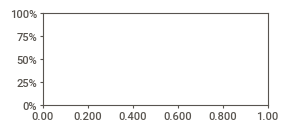

In [145]:
#analyzing the dataset
advert_report = sv.analyze([data,'Work Related Injury'],target_feat='no_injuries_illnesses',pairwise_analysis="on")
#display the report
advert_report.show_notebook(w='100%')